In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score
from sklearn.pipeline import Pipeline

from feature_engine.selection import (
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures,
)

In [2]:
data = pd.read_csv('image_bins_stats_lungs3.csv')
data.shape

(2488, 106)

In [3]:
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,transformed_image_covid_1.png,4722,15567,4,7683,12061,1,8864,16634,77.433079,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,transformed_image_covid_2.png,6556,13701,25,9956,9437,0,12114,13747,79.728951,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,transformed_image_covid_3.png,10512,12249,1,11502,7743,2,9619,13908,68.987348,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,transformed_image_covid_4.png,7987,11854,2,10419,11895,9,11931,11439,94.638788,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,transformed_image_covid_5.png,7761,14159,4,10898,10560,9,9153,12992,68.762015,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [4]:
data = data.drop(['filename'], axis=1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722,15567,4,7683,12061,1,8864,16634,77.433079,0.202929,...,29.26670025,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0
1,6556,13701,25,9956,9437,0,12114,13747,79.728951,5.447851,...,33.53821958,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0
2,10512,12249,1,11502,7743,2,9619,13908,68.987348,36.388358,...,25.22521593,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0
3,7987,11854,2,10419,11895,9,11931,11439,94.638788,15.529948,...,34.51618537,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0
4,7761,14159,4,10898,10560,9,9153,12992,68.762015,4.809379,...,32.13721328,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0


In [5]:
name = ['rstd_bins0','rstd_bins1','rstd_bins2','rstd_bins3','rstd_bins4','rstd_bins5','rstd_bins6','rstd_bins7','rskew_bins0','rskew_bins1','rskew_bins2','rskew_bins3','rskew_bins4','rskew_bins5','rskew_bins6','rskew_bins7','gstd_bins0','gstd_bins1','gstd_bins2','gstd_bins3','gstd_bins4','gstd_bins5','gstd_bins6','gstd_bins7','bstd_bins0','bstd_bins1','bstd_bins2','bstd_bins3','bstd_bins4','bstd_bins5','bstd_bins6','bstd_bins7','gskew_bins0','gskew_bins1','gskew_bins2','gskew_bins3','gskew_bins4','gskew_bins5','gskew_bins6','gskew_bins7','bskew_bins0','bskew_bins1','bskew_bins2','bskew_bins3','bskew_bins4','bskew_bins5','bskew_bins6','bskew_bins7','class']
for i in name:
    data[i] = pd.to_numeric(data[i],errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Columns: 105 entries, Bins0 to class
dtypes: float64(96), int64(9)
memory usage: 2.0 MB


In [7]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(data)

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,rmean_bins0,rmean_bins1,...,bskew_bins7,bkurto_bins0,bkurto_bins1,bkurto_bins2,bkurto_bins3,bkurto_bins4,bkurto_bins5,bkurto_bins6,bkurto_bins7,class
0,4722.0,15567.0,4.0,7683.0,12061.0,1.0,8864.0,16634.0,77.433079,0.202929,...,29.266700,39.092067,21.915792,15.564234,10.232452,12.530200,0.000000,40.674295,31.538221,0.0
1,6556.0,13701.0,25.0,9956.0,9437.0,0.0,12114.0,13747.0,79.728951,5.447851,...,33.538220,28.281468,23.127681,11.979449,17.519198,24.313131,0.000000,38.506228,36.562100,0.0
2,10512.0,12249.0,1.0,11502.0,7743.0,2.0,9619.0,13908.0,68.987348,36.388358,...,25.225216,26.681675,24.442798,0.000000,12.323460,38.083555,4.204482,55.658016,27.952446,0.0
3,7987.0,11854.0,2.0,10419.0,11895.0,9.0,11931.0,11439.0,94.638788,15.529948,...,34.516185,24.056261,28.558353,0.840896,13.800903,27.757483,33.449086,44.809595,37.884099,0.0
4,7761.0,14159.0,4.0,10898.0,10560.0,9.0,9153.0,12992.0,68.762015,4.809379,...,32.137213,27.884767,23.329477,13.445587,16.742312,28.738945,26.135224,49.330295,35.162254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,9870.0,10436.0,13.0,9558.0,9764.0,0.0,16080.0,9815.0,104.708207,27.440974,...,28.826381,16.609479,32.541509,10.841782,18.263777,29.591836,0.000000,43.584547,43.219779,1.0
2484,5946.0,14026.0,1.0,11041.0,12415.0,0.0,7886.0,14221.0,74.044736,1.607016,...,39.246127,30.936390,21.337923,0.000000,9.706518,17.877323,0.000000,45.339391,32.611797,1.0
2485,7330.0,8408.0,6.0,10811.0,18521.0,2.0,6699.0,13759.0,112.515416,7.136774,...,28.790502,42.515393,18.625921,11.891740,14.170267,3.991819,0.000000,36.311970,41.914116,1.0
2486,7630.0,16431.0,1.0,9530.0,3413.0,3.0,17843.0,10685.0,73.122412,24.310145,...,37.426827,20.622111,29.148814,0.000000,20.197666,31.678731,4.769168,50.967873,38.781249,1.0


In [8]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1735, 104), (744, 104))

In [9]:
# the ML model for which we want to select features

model = GradientBoostingClassifier(
    n_estimators=10,
    max_depth=2,
    random_state=10,
)

In [10]:
# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'accuracy', # the metric we want to evalute
    threshold = 0.0005, # the maximum performance drop allowed to remove a feature
    cv=2, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(X_train, y_train)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingClassifier(max_depth=2,
                                                                 n_estimators=10,
                                                                 random_state=10),
                            scoring='accuracy', threshold=0.0005,
                            variables=['Bins0', 'Bins1', 'Bins2', 'Bins3',
                                       'Bins4', 'Bins5', 'Bins6', 'Bins7',
                                       'rmean_bins0', 'rmean_bins1',
                                       'rmean_bins2', 'rmean_bins3',
                                       'rmean_bins4', 'rmean_bins5',
                                       'rmean_bins6', 'rmean_bins7',
                                       'rstd_bins0', 'rstd_bins1', 'rstd_bins2',
                                       'rstd_bins3', 'rstd_bins4', 'rstd_bins5',
                                       'rstd_bins6', 'rstd_bins7',
  

In [11]:
# performance of model trained using all features

sel.initial_model_performance_

0.8046092250942123

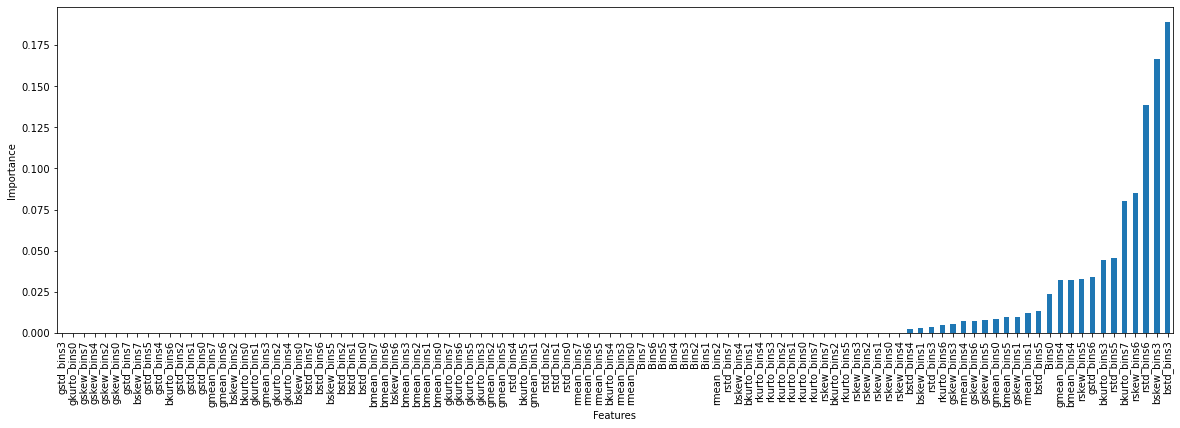

In [12]:
# importance of all features based of initial model

sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

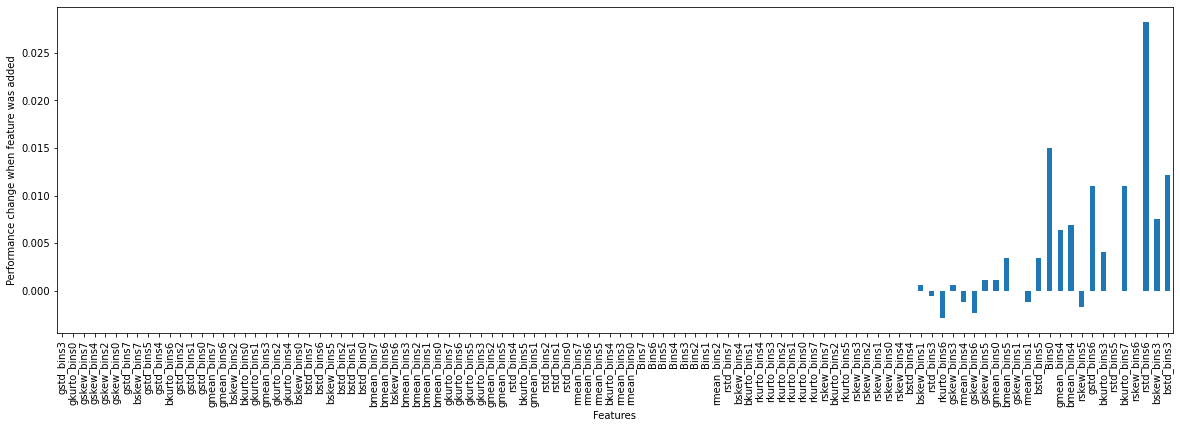

In [13]:
pd.Series(sel.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [14]:
# Number of features that will be removed

len(sel.features_to_drop_)

89

In [15]:
# select features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((1735, 15), (744, 15))

In [16]:
# now for comparison
# fit the model with the selected features
model.fit(X_train, y_train)

# make predictions
y_pred_test = model.predict(X_test)

# calculate roc-auc
accuracy_final = accuracy_score(y_test, y_pred_test)
print('Test selected features (Accuracy)=%f' % (accuracy_final))

Test selected features (Accuracy)=0.802419


In [17]:
# create a function to build random forests and
# compare its performance in train and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    y_pred = rf.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [18]:
# embedded methods - Random forests
run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.9424531514356883
Test set
Random Forests roc-auc: 0.9098435462842243
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       354
           1       0.84      0.81      0.83       390

    accuracy                           0.82       744
   macro avg       0.82      0.82      0.82       744
weighted avg       0.82      0.82      0.82       744

Confusion Matrix:
[[294  60]
 [ 73 317]]
Metrics:
Accuracy: 0.821
F1 Score: 0.827
Precision: 0.841
Recall: 0.813
After Cross Validation:
Accuracy: 83.74 %
Standard Deviation: 2.21 %


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = logit.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [20]:
run_logistic(X_train, X_test, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.882337642141051
Test set
Logistic Regression roc-auc: 0.8485368680283935
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       354
           1       0.80      0.82      0.81       390

    accuracy                           0.80       744
   macro avg       0.80      0.79      0.79       744
weighted avg       0.80      0.80      0.80       744

Confusion Matrix:
[[272  82]
 [ 70 320]]
Metrics:
Accuracy: 0.796
F1 Score: 0.808
Precision: 0.796
Recall: 0.821
After Cross Validation:
Accuracy: 81.96 %
Standard Deviation: 2.26 %


In [21]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_kernel_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [22]:
run_kernel_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.5669031550554086
Test set
Kernel SVM roc-auc: 0.5582645226713023
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.47      0.57       354
           1       0.64      0.84      0.72       390

    accuracy                           0.66       744
   macro avg       0.68      0.65      0.65       744
weighted avg       0.68      0.66      0.65       744

Confusion Matrix:
[[166 188]
 [ 62 328]]
Metrics:
Accuracy: 0.664
F1 Score: 0.724
Precision: 0.636
Recall: 0.841
After Cross Validation:
Accuracy: 65.30 %
Standard Deviation: 4.48 %


In [23]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.neighbors import KNeighborsClassifier

def run_knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('KNN roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [24]:
run_knn(X_train, X_test, y_train, y_test)

Train set
KNN roc-auc: 0.5
Test set
KNN roc-auc: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.65       354
           1       0.69      0.74      0.71       390

    accuracy                           0.69       744
   macro avg       0.69      0.68      0.68       744
weighted avg       0.69      0.69      0.68       744

Confusion Matrix:
[[222 132]
 [102 288]]
Metrics:
Accuracy: 0.685
F1 Score: 0.711
Precision: 0.686
Recall: 0.738
After Cross Validation:
Accuracy: 66.74 %
Standard Deviation: 3.49 %


In [25]:
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(X_train)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(X_test)
    print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [26]:
run_decision_tree(X_train, X_test, y_train, y_test)

Train set
Decision Tree roc-auc: 1.0
Test set
Decision Tree roc-auc: 0.8042155584528466
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       354
           1       0.82      0.79      0.81       390

    accuracy                           0.80       744
   macro avg       0.80      0.80      0.80       744
weighted avg       0.80      0.80      0.80       744

Confusion Matrix:
[[288  66]
 [ 80 310]]
Metrics:
Accuracy: 0.804
F1 Score: 0.809
Precision: 0.824
Recall: 0.795
After Cross Validation:
Accuracy: 81.61 %
Standard Deviation: 2.17 %


In [27]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.naive_bayes import GaussianNB

def run_naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [28]:
run_naive_bayes(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.3065782382419421
Test set
Kernel SVM roc-auc: 0.3150441836882515
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70       354
           1       0.71      0.87      0.78       390

    accuracy                           0.75       744
   macro avg       0.76      0.74      0.74       744
weighted avg       0.76      0.75      0.74       744

Confusion Matrix:
[[217 137]
 [ 50 340]]
Metrics:
Accuracy: 0.749
F1 Score: 0.784
Precision: 0.713
Recall: 0.872
After Cross Validation:
Accuracy: 74.87 %
Standard Deviation: 3.50 %


In [29]:
# create a function to build logistic regression
# and compare its performance in train and test sets
from sklearn.svm import SVC

def run_linear_SVM(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
    classifier.fit(X_train, y_train)
    
    print('Train set')
    pred = classifier.predict_proba(scaler.transform(X_train))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = classifier.predict_proba(scaler.transform(X_test))
    print('Kernel SVM roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('Metrics:')
    print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
    print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
    
    print('After Cross Validation:')
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
run_linear_SVM(X_train, X_test, y_train, y_test)

Train set
Kernel SVM roc-auc: 0.8585627609165469
Test set
Kernel SVM roc-auc: 0.8714540167211924
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       350
         1.0       0.89      0.93      0.91       393

    accuracy                           0.90       743
   macro avg       0.90      0.90      0.90       743
weighted avg       0.90      0.90      0.90       743

Confusion Matrix:
[[304  46]
 [ 29 364]]
Metrics:
Accuracy: 0.899
F1 Score: 0.907
Precision: 0.888
Recall: 0.926
After Cross Validation:
